In [1]:
from compas.datastructures import Mesh
from compas_plotters import MeshPlotter

In [2]:
mesh = Mesh.from_obj('../resources/delaunay.obj')

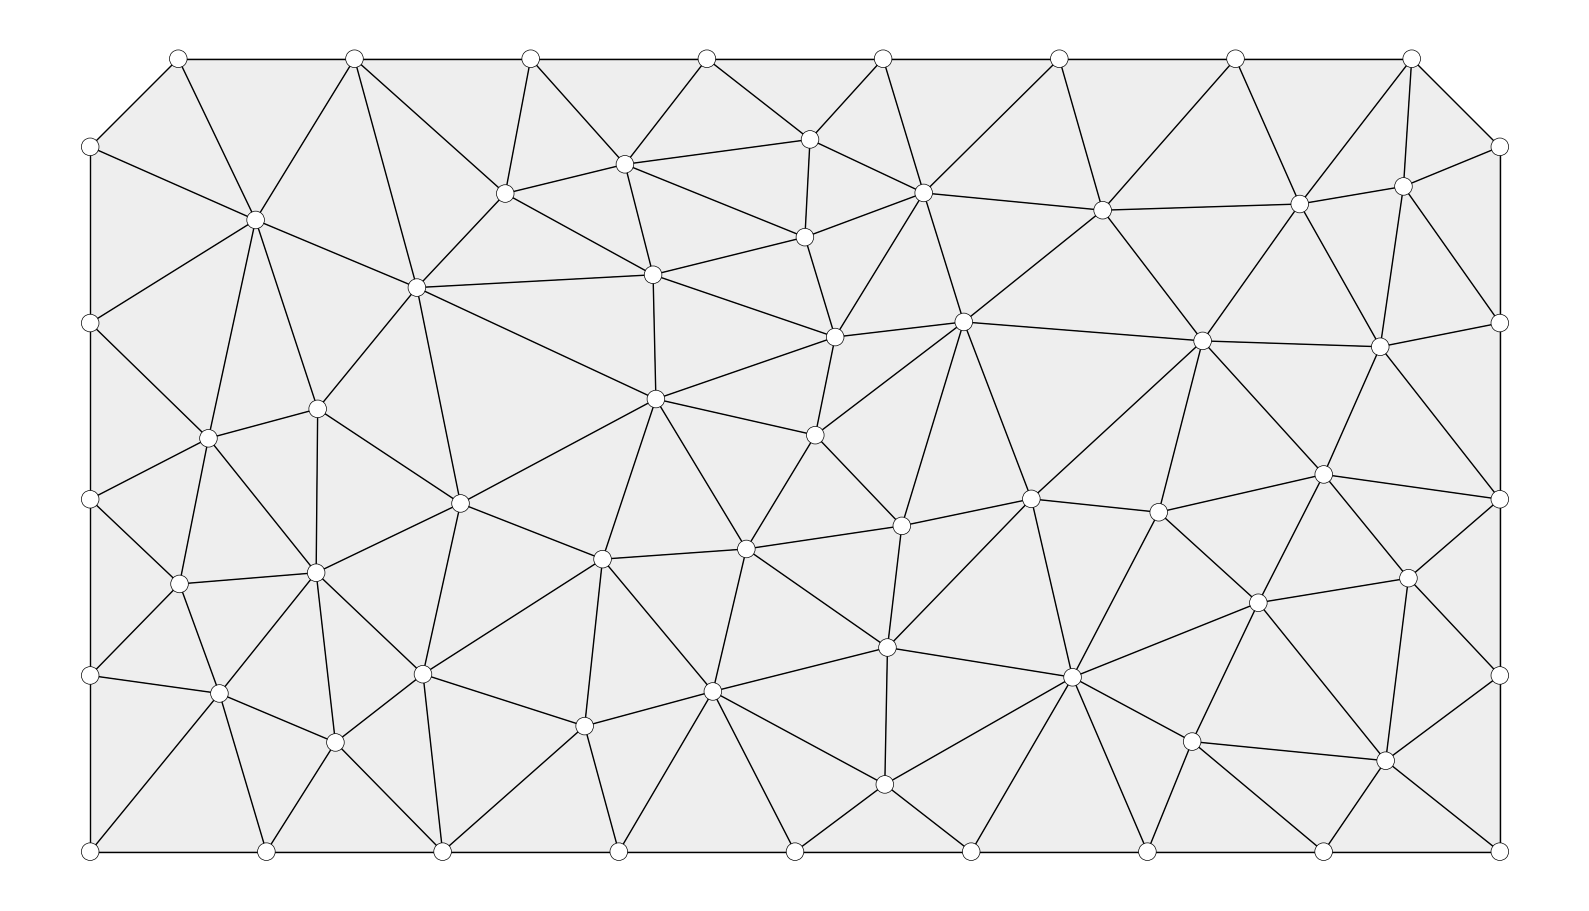

In [3]:
plotter = MeshPlotter(mesh)
plotter.draw_edges()
plotter.draw_faces()
plotter.draw_vertices()
plotter.show()

## the hard way

In [22]:
dual = Mesh()

In [23]:
for fkey in mesh.faces():
    fc = mesh.face_centroid(fkey)
    #print(fkey, fc)
    dual.add_vertex(fkey, x=fc[0], y=fc[1])

In [24]:
dual.summary()


Mesh summary

- name: Mesh
- vertices: 103
- edges: 0
- faces: 0
- vertex degree: 0/0
- face degree: 0/0




In [25]:
for vkey in mesh.vertices():
    vf = mesh.vertex_faces(vkey, ordered=True)
    #print(vkey, vf)
    if len(vf)>3:
        dual.add_face(vf)

In [26]:
dual.summary()


Mesh summary

- name: Mesh
- vertices: 103
- edges: 145
- faces: 43
- vertex degree: 2/3
- face degree: 2/7




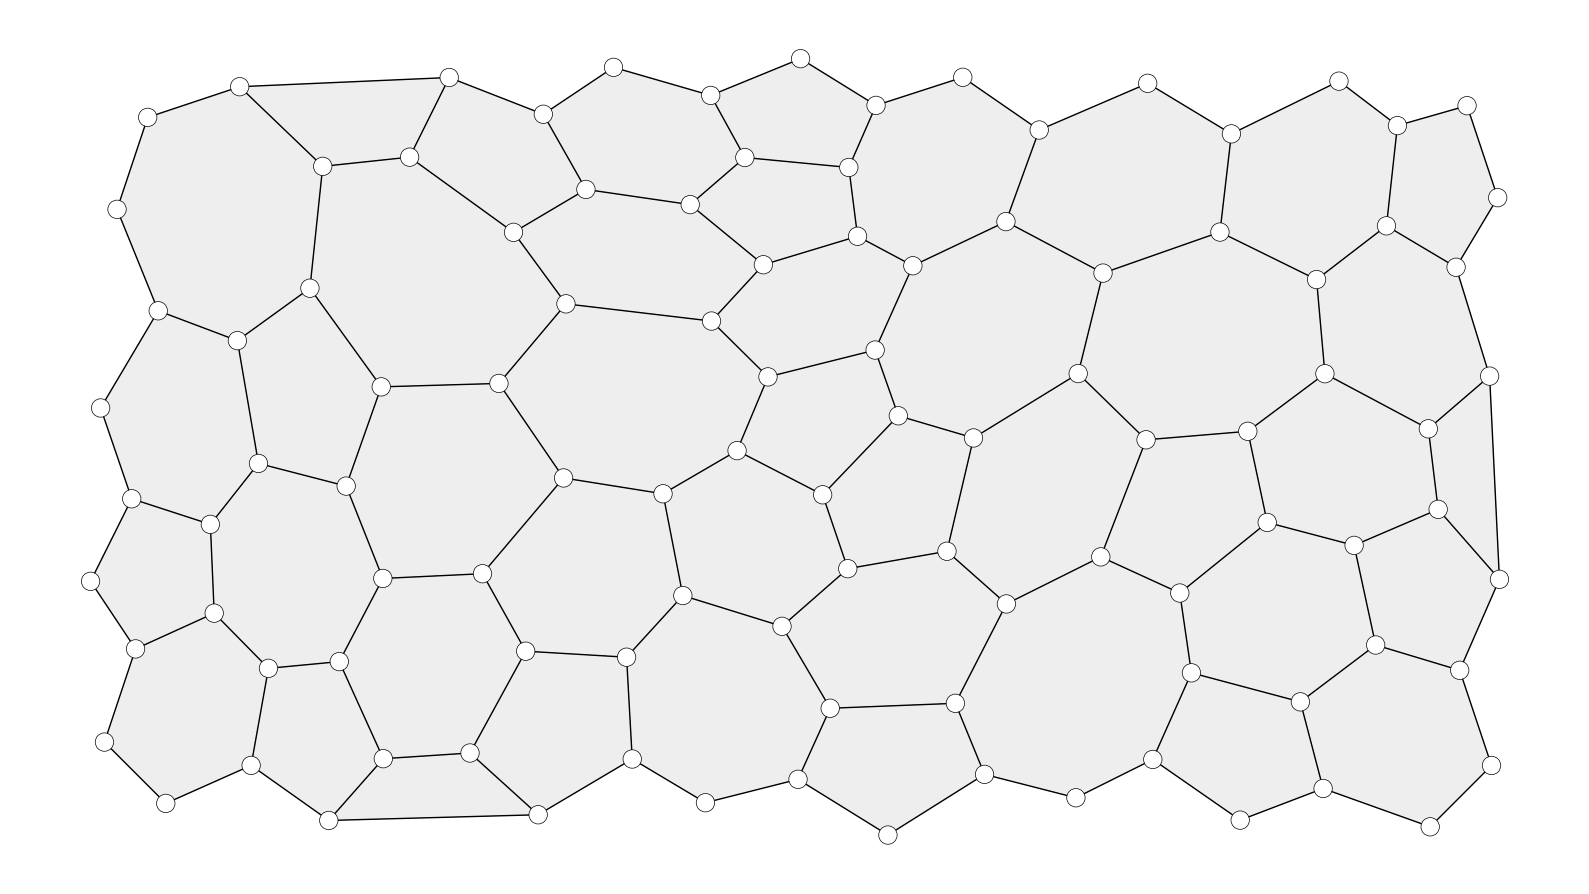

In [27]:
plotter = MeshPlotter(dual)
plotter.draw_edges()
plotter.draw_faces()
plotter.draw_vertices()
plotter.show()

## the easy way

In [17]:
from compas.datastructures import mesh_dual

In [18]:
compas_dual = mesh_dual(mesh)

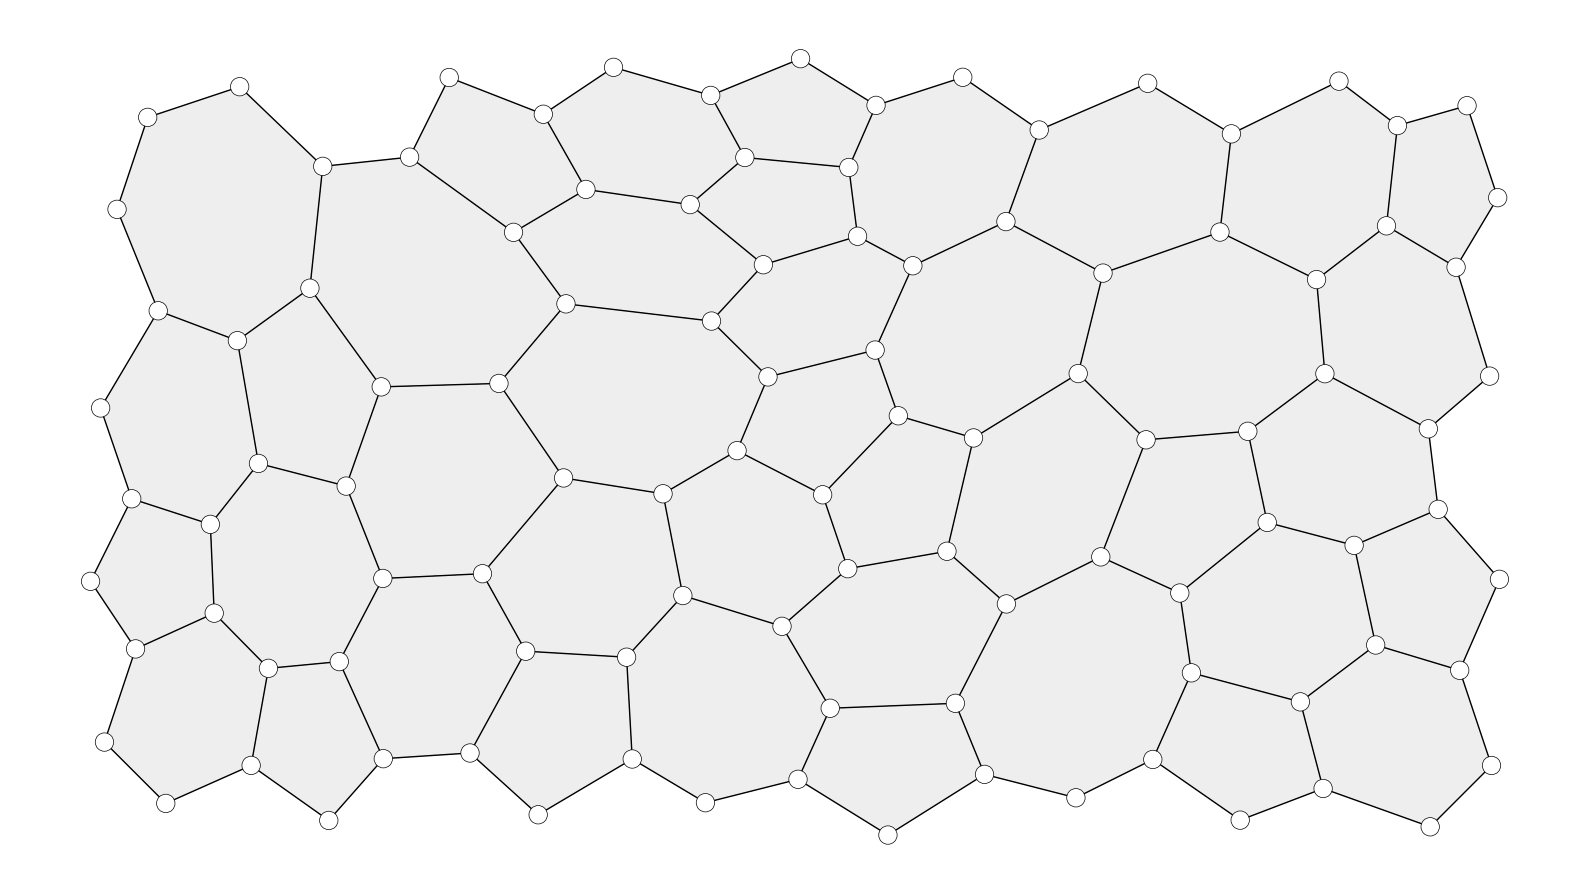

In [19]:
plotter = MeshPlotter(compas_dual)
plotter.draw_edges()
plotter.draw_faces()
plotter.draw_vertices()
plotter.show()

In [37]:
compas_dual.to_obj('/Users/bernham/Desktop/compas_dual.obj')

In [20]:
mesh_dual?

In [ ]:
def my_mesh_dual(mesh, cls=None):
    """Construct the dual of a mesh.

    Parameters
    ----------
    mesh : Mesh
        A mesh object.
    cls : Mesh, optional [None]
        The type of the dual mesh.
        Defaults to the type of the provided mesh object.

    Returns
    -------
    Mesh
        The dual mesh object.

    Examples
    --------
    >>>

    """
    if not cls:
        cls = type(mesh)

    dual = cls()

    fkey_centroid = {fkey: mesh.face_centroid(fkey) for fkey in mesh.faces()}
    outer = mesh.vertices_on_boundary()
    inner = list(set(mesh.vertices()) - set(outer))
    vertices = {}
    faces = {}

    for key in inner:
        fkeys = mesh.vertex_faces(key, ordered=True)
        for fkey in fkeys:
            if fkey not in vertices:
                vertices[fkey] = fkey_centroid[fkey]
        faces[key] = fkeys

    for key, (x, y, z) in vertices.items():
        dual.add_vertex(key, x=x, y=y, z=z)

    for fkey, vertices in faces.items():
        dual.add_face(vertices, fkey=fkey)

    return dual

In [28]:
my_dict = {}
alphabet = 'abcdefghijklmnopqrstuvwxyz'
for i in range(26):
    my_dict[alphabet[i]] = i
print(my_dict)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}


In [29]:
my_dict[2]

KeyError: 2

In [34]:
list(my_dict.keys())

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [35]:
lk = list(my_dict.keys())
my_dict[lk[2]]

2